# <font color='maroon'>Practice Challenge</font>

For this notebook, you will be practicing the concepts we have covered in Hypothesis Testing in response to primarily the two prompts presented in the LMS:

1. We have data on Bitcoin prices from August to September. Determine the standard deviation  . Use it to calculate the the   confidence interval. Discuss what confidence level you chose, and why? Use simple random sampling to sample from the data set to generate several confidence intervals. Plot these confidence intervals using an error bar plot. Discuss your observations and findings.
2. When we have a small sample with standard deviation unknown, we can use a t-test to test our hypothesis about the population. We can estimate the standard deviation from the sample size. So, given that the average life of 6 batteries is 30 months with a standard deviation of 4 months, is a manufacturing exaggerating when he claims the average life of his batteries is 3 years? Use a significance level of 5% to test his claim. 

### Question 1

Load the data on Bitcoin prices from August to September.

In [1]:
# load your libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rnd
import scipy.stats as stats
import numpy as np
from math import sqrt

In [2]:
%matplotlib inline

In [4]:
df = pd.read_csv('coindesk-bpi-USD-close_data-2017-11-22_2017-11-23.csv', sep=',', index_col='Date')

In [5]:
df.tail()

,Close Price
Date,
2017-11-23 12:47:00,8169.01
2017-11-23 12:48:00,8172.60
2017-11-23 12:49:00,8174.09
This data was produced from the CoinDesk price page.,NaN
http://www.coindesk.com/price/,NaN


In [6]:
df = df[:-2] # drop last 2 rows

In [7]:
df.describe()

,Close Price
count,2209.000000
mean,8193.823612
std,50.871060
min,8074.530000
25%,8147.910000
50%,8193.770000
75%,8239.370000
max,8294.490000


#### Question 1.1
Study the dataset. Are there missing values? Do something about the missing values. What types are the variables in the columns?

In [8]:
# taking the count of Null/NaN in each column of dataframe
df.isnull().sum()

Close Price    0
dtype: int64

### Answer
I remove the rows that have 'NaN' data as it is a very small count and making these a '0' value might influence any further calculations

In [9]:
df_cleaned = df.dropna(how='any')

In [10]:
# taking the count of Null/NaN in each column of dataframe
df_cleaned.isnull().sum()

Close Price    0
dtype: int64

In [11]:
df_cleaned.head()

,Close Price
Date,
2017-11-22 00:00:00,8095.59
2017-11-22 00:01:00,8092.53
2017-11-22 00:02:00,8088.07
2017-11-22 00:03:00,8086.57
2017-11-22 00:04:00,8087.55


In [12]:
df_cleaned

,Close Price
Date,
2017-11-22 00:00:00,8095.59
2017-11-22 00:01:00,8092.53
2017-11-22 00:02:00,8088.07
2017-11-22 00:03:00,8086.57
2017-11-22 00:04:00,8087.55
2017-11-22 00:05:00,8089.47
2017-11-22 00:06:00,8093.81
2017-11-22 00:07:00,8102.10
2017-11-22 00:08:00,8106.14


#### Question 1.2
Produce a line graph of the data on Bitcoin.

In [15]:
#df = pd.to_datetime(df['Date'], format='%Y%m%d', errors='ignore')

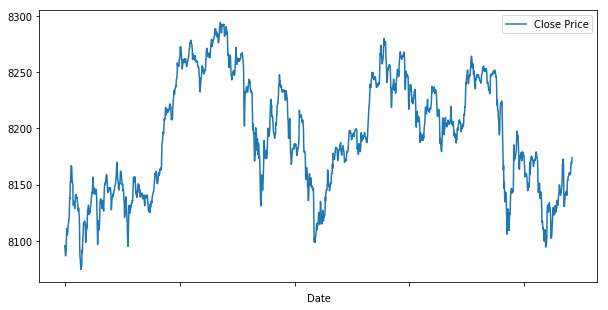

In [14]:
df_cleaned.plot(y='Close Price', figsize=(10,5))

#### Question 1.3

Sample from the dataset using simple random sampling. Calculate the mean and standard deviation of each sample. Use it to calculate 95% confidence intervals.

In [17]:
samples = []
n = 500   # number of samples
j = 1  # size of each sample
for i in range(n):
    samples.append(rnd.sample(df_cleaned['Close Price'].tolist(), k=j)) # take 500 samples from the Height and Weight dataset, each size 5000

In [27]:
means = [np.asarray(i).mean() for i in samples]

In [28]:
devis = [np.asarray(i).std() for i in samples]

In [29]:
len(means)

500

In [33]:
#print(means)
mean = np.mean(samples)
print(mean)
sigma = np.std(samples)
print(devis)

8193.4179
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [34]:
conf_int = stats.norm.interval(0.95,       # confidence level
                               loc=mean,   # mean
                               scale=sigma/sqrt(n))# error

In [35]:
conf_int

(8189.0858310477615, 8197.74996895224)

#### Question 1.3
Plot these confidence intervals using an error bar plot. Discuss the results your observe.

In [36]:
intervals = []    # confidence intervals 
sample_means = []
for i in range(0,10):
    sample = np.random.choice(df['Close Price'], size=25)  # take a random sample of size 25 from data
    sample_means.append(np.mean(sample))          # compute the sample mean 
    deviation = sigma / sqrt(len(sample))              # compute part sigma/sqrt(n)
    intervals.append(stats.norm.interval(.95, loc=np.mean(sample), scale=deviation)) # compute the confidence interval
intervals

[(8180.828798679153, 8219.576001320844),
 (8190.233998679156, 8228.981201320847),
 (8170.781998679154, 8209.529201320844),
 (8167.353998679155, 8206.101201320846),
 (8170.308398679154, 8209.055601320844),
 (8163.446398679153, 8202.193601320843),
 (8174.415198679157, 8213.162401320847),
 (8182.707598679155, 8221.454801320846),
 (8188.444798679155, 8227.192001320846),
 (8177.256798679155, 8216.004001320845)]

In [37]:
yerr = []
for i in intervals:
    yerr.append(i[1] - i[0]) # now have two separate numbers

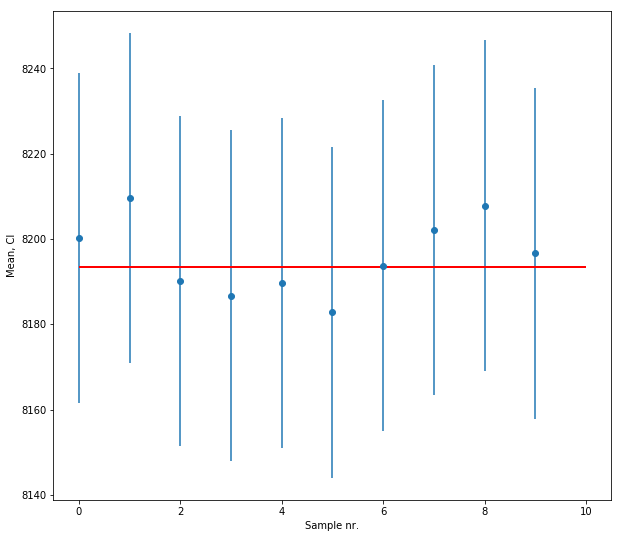

In [38]:
plt.figure(figsize=(10,9))
plt.errorbar(x=np.arange(0,10), 
             y=sample_means,
             yerr=yerr,
            fmt = 'o')
plt.xlabel('Sample nr.')
plt.ylabel('Mean, CI')
plt.hlines(xmin=0, xmax=10,
           y=mean, 
           linewidth=2.0,
           color="red")

#plt.errorbar([0,1,2,3], data_m, yerr=ss.t.ppf(0.95, data_df)*data_sd)

### Question 2

When we know the sample size is small and the variance is unknown we can use a t-test to test our hypothesis about the test-statistic. We can estimate the standard deviation from the sample size and proceed to test our hypothesis. The average life of 6 car batteries is 30 months with a standard deviation of 4 months. The manufacturer claims an average life of 3 years for his batteries. We suspect that he is exaggerating. Use a 5% significance level to test his claim.

Question courtesy of [The Average Car Battery Life: When Is It Time for a Change?](http://knowhow.napaonline.com/average-car-battery-life-time-change/).

In [ ]:
### Question 3